In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Define functions

In [2]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

def smooth(x, window_len=11, window='hanning'):
    x = np.array(x)
    nans, y = nan_helper(x)
    x[nans] = np.interp(y(nans), y(~nans), x[~nans])
    s = np.r_[x[window_len - 1:0:-1], x, x[-2:-window_len - 1:-1]]
    if window == 'flat':  # moving average
        w = np.ones(window_len, 'd')
    else:
        w = eval('np.' + window + '(window_len)')
    y = np.convolve(w / w.sum(), s, mode='valid')
    return y

### Simple plot

Doesn't take into account the different length of segments

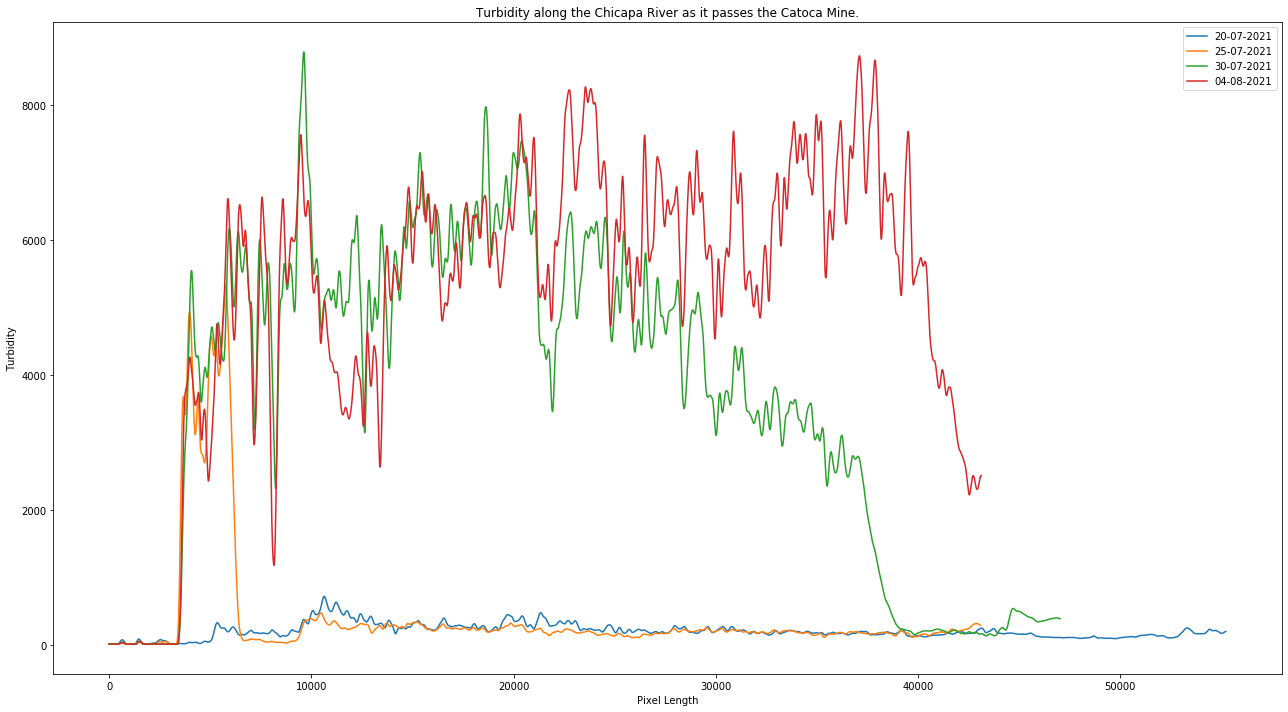

In [6]:
folder = "data/csv"
files = os.listdir(folder)
files.sort()
files = files[1:] + [files[0]]
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_xlabel("Pixel Length")
ax.set_ylabel("Turbidity")
for file in files:
    df = pd.read_csv(os.path.join(folder, file))
    y = smooth(df["Turbidity"], window_len=400)
    x = range(len(y))    
    ax.plot(x, y, label=file.split("_")[1].split(".")[0])
plt.title("Turbidity along the Chicapa River as it passes the Catoca Mine.")
plt.legend()
plt.tight_layout()